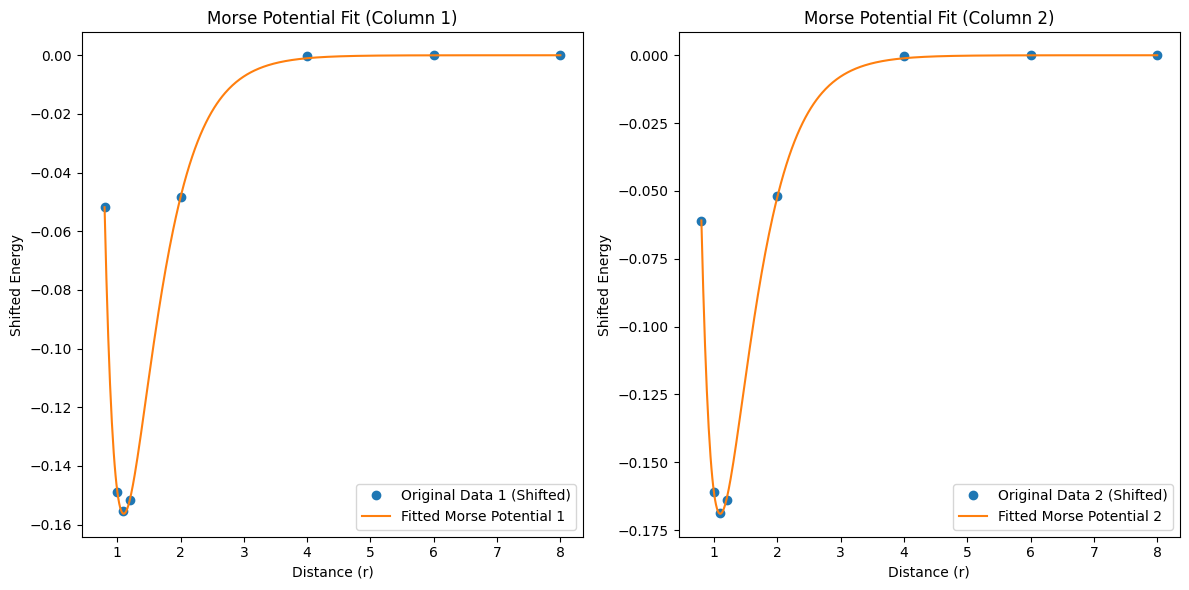

Fitted parameters for Column 1 (D_e, a, r_e): [0.15631871 1.97928194 1.10189917]
Fitted parameters for Column 2 (D_e, a, r_e): [0.16901039 1.97291685 1.09788243]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define Morse potential function
def morse_potential(r, D_e, a, r_e):
    return D_e * (np.exp(-2 * a * (r - r_e)) - 2 * np.exp(-a * (r - r_e)))

# Given data points
distances = np.array([0.8, 1.0, 1.09, 1.20, 2.0, 4.0, 6.0, 8.0])
energy_values_1 = np.array([-40.11047073, -40.20768605, -40.21421815, -40.21042175, -40.10715870, -40.05898518, -40.05870267, -40.05870191])
energy_values_2 = np.array([-40.254135744605, -40.354197994043, -40.361796492612, -40.357224214362, -40.245058346807, -40.193527380341, -40.193154001501, -40.193151363343])

# Subtract the value at distance 8.0 from all energy values
energy_values_1_shifted = energy_values_1 - energy_values_1[-1]
energy_values_2_shifted = energy_values_2 - energy_values_2[-1]

# Initial guess for the parameters [D_e, a, r_e]
initial_guess_1 = [1.0, 1.0, 2.0]
initial_guess_2 = [1.0, 1.0, 2.0]

# Fit Morse potential to the shifted data
popt_1, _ = curve_fit(morse_potential, distances, energy_values_1_shifted, p0=initial_guess_1)
popt_2, _ = curve_fit(morse_potential, distances, energy_values_2_shifted, p0=initial_guess_2)

# Generate new distance values for interpolation
new_distances = np.linspace(min(distances), max(distances), 500)

# Calculate fitted energy values
fitted_energy_1 = morse_potential(new_distances, *popt_1)
fitted_energy_2 = morse_potential(new_distances, *popt_2)

# Plot the original data points and the fitted values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(distances, energy_values_1_shifted, 'o', label='Original Data 1 (Shifted)')
plt.plot(new_distances, fitted_energy_1, '-', label='Fitted Morse Potential 1')
plt.xlabel('Distance (r)')
plt.ylabel('Shifted Energy')
plt.legend()
plt.title('Morse Potential Fit (Column 1)')

plt.subplot(1, 2, 2)
plt.plot(distances, energy_values_2_shifted, 'o', label='Original Data 2 (Shifted)')
plt.plot(new_distances, fitted_energy_2, '-', label='Fitted Morse Potential 2')
plt.xlabel('Distance (r)')
plt.ylabel('Shifted Energy')
plt.legend()
plt.title('Morse Potential Fit (Column 2)')

plt.tight_layout()
plt.show()

# One graph is for the energy values with zero point correction, and the other without zero point correction.

# Print the fitted parameters
print("Fitted parameters for Column 1 (D_e, a, r_e):", popt_1)
print("Fitted parameters for Column 2 (D_e, a, r_e):", popt_2)
